In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xb
import matplotlib.pyplot as plt

## Loading the dataset
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<b>PassengerID</b> and <b>Name</b> is irrelavant column so deleting it

In [119]:
## deleting unwanted columns
df = df.drop(['PassengerId', 'Name'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
## Checking the size of the data
df.shape

(418, 10)

Data is of small size

In [121]:
## checking for null values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In Age and Cabin there are lot of null values let's deal with them

In [122]:
## Dealing with cabin first
print(df['Cabin'].nunique())
df['Cabin'].unique()


76


array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

Since we have only 418 rows in the data and out of them 327 is null means only (418 - 327 = 91) rows may be informative but in this 91 rows there are 76 unique cabin. Hence Cabin column is irrelavant and we can drop it

In [123]:
## Deleting Cabin Column
df = df.drop(['Cabin'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,0,3,male,NaN,0,0,359309,8.0500,S


In [124]:
## Dealing with Age
df.Age.unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

We can notice two things here</p>
<li>First Age is float datatype which should be int</li>
<li>Some ages are less than one it means they can be children of some month so we will consider them 1</li>

In [125]:
## Applying KNN imputer for filling null values
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors= 5)
df['Age'] = knn.fit_transform(df[['Age']])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

So we have succesfully dealt with the null values now it's time to change it's datatype

In [126]:
## Changing datatype of Age
df['Age'] = df['Age'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 29.5+ KB


In [127]:
df.Age.unique()

array([34, 47, 62, 27, 22, 14, 30, 26, 18, 21, 46, 23, 63, 24, 35, 45, 55,
        9, 48, 50, 41, 33, 25, 39, 60, 36, 20, 28, 10, 17, 32, 13, 31, 29,
        6, 67, 49,  2, 76, 43, 16,  1, 12, 42, 53, 40, 61,  7, 15, 54, 64,
       37, 11,  8,  0, 38, 57, 19, 58, 59, 44,  5, 51,  3])

In [128]:
## since age is int let's again check unique values
print(f"Before: {df['Age'].unique()}")
print(f"Before: Unique - {df.Age.nunique()}\n")

## Now in age some 0 will come because of converting to int, changing it to 1
df['Age'] = df['Age'].replace(0,1)
print(f"After: {df['Age'].unique()}")
print(f"After: Unique - {df.Age.nunique()}")

Before: [34 47 62 27 22 14 30 26 18 21 46 23 63 24 35 45 55  9 48 50 41 33 25 39
 60 36 20 28 10 17 32 13 31 29  6 67 49  2 76 43 16  1 12 42 53 40 61  7
 15 54 64 37 11  8  0 38 57 19 58 59 44  5 51  3]
Before: Unique - 64

After: [34 47 62 27 22 14 30 26 18 21 46 23 63 24 35 45 55  9 48 50 41 33 25 39
 60 36 20 28 10 17 32 13 31 29  6 67 49  2 76 43 16  1 12 42 53 40 61  7
 15 54 64 37 11  8 38 57 19 58 59 44  5 51  3]
After: Unique - 63


In [129]:
## Since Fare has just one Nan Value so i can replace simply by the mean of it
df['Fare'] = df['Fare'].fillna(np.mean(df.Fare))
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Bravo ! We have done with dealing Null Values

Now Since am confuse if ticket is affecting the survive column or not i will use some statistical methods

In [130]:
## Using Chi square test for it
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Ticket'], df['Survived'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Score: {chi2}, P-value: {p}")

## Conclusion
if p < 0.05:
    print("Feature is affecting the Target")
else:
    print("Feature is not affecting the Target")



Chi2 Score: 351.5940476190476, P-value: 0.642691953059776
Feature is not affecting the Target


So with test we can drop Ticket Column also

In [131]:
df.drop('Ticket', axis = 1, inplace= True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34,0,0,7.8292,Q
1,1,3,female,47,1,0,7.0000,S
2,0,2,male,62,0,0,9.6875,Q
3,0,3,male,27,0,0,8.6625,S
4,1,3,female,22,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30,0,0,8.0500,S
414,1,1,female,39,0,0,108.9000,C
415,0,3,male,38,0,0,7.2500,S
416,0,3,male,30,0,0,8.0500,S


In [132]:
## Let's do Now Data preprocessing steps

#1 - Sex {male : 1 , female: 0}
df['Sex'] = df['Sex'].map({"male" : 1 , "female": 0})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34,0,0,7.8292,Q
1,1,3,0,47,1,0,7.0000,S
2,0,2,1,62,0,0,9.6875,Q
3,0,3,1,27,0,0,8.6625,S
4,1,3,0,22,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,1,30,0,0,8.0500,S
414,1,1,0,39,0,0,108.9000,C
415,0,3,1,38,0,0,7.2500,S
416,0,3,1,30,0,0,8.0500,S


In [133]:
## Embarked
df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

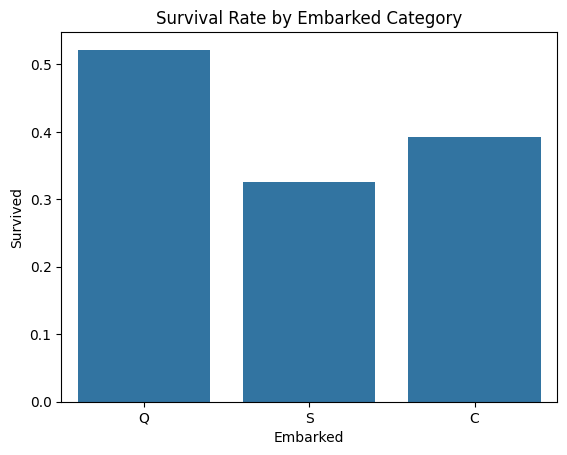

In [134]:
## checking if Embarked category affect the survive
sns.barplot(data=df, x='Embarked', y='Survived', estimator=lambda x: sum(x)/len(x), errorbar = None)  # Shows survival rate per Embarked category
plt.title("Survival Rate by Embarked Category")
plt.show()


It looks like Embarked Affects the surviving so For Q - 3, C - 2, S - 1

In [135]:
#2 - Embarked 
df['Embarked'] = df['Embarked'].map({"Q": 3, "C": 2, "S": 1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34,0,0,7.8292,3
1,1,3,0,47,1,0,7.0000,1
2,0,2,1,62,0,0,9.6875,3
3,0,3,1,27,0,0,8.6625,1
4,1,3,0,22,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,0,3,1,30,0,0,8.0500,1
414,1,1,0,39,0,0,108.9000,2
415,0,3,1,38,0,0,7.2500,1
416,0,3,1,30,0,0,8.0500,1


Data Preprocessing is done

Let's check distribution of all columns

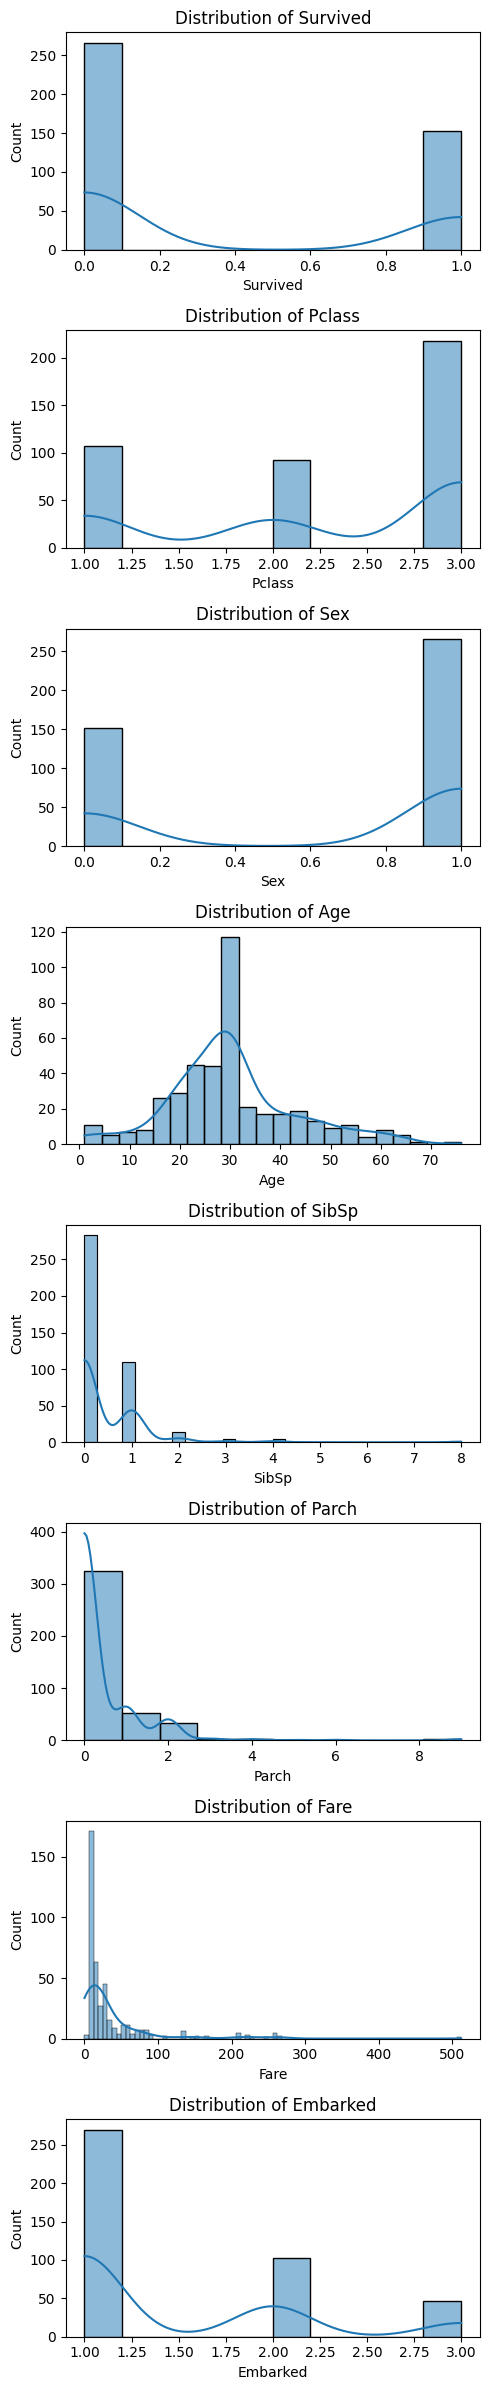

In [136]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(5, 3 * len(df.columns)))  # Set figure size dynamically

for i, v in enumerate(df.columns):  # Loop through column names
    sns.histplot(df[v], ax=axes[i], kde=True)  # Use correct ax reference
    axes[i].set_title(f"Distribution of {v}")  # Set title for each plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

All is ok but the fare is right sckewed which may create issue so making is approx to normal by using yeo johnson method

In [137]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(np.log1p)
df['Fare'] = trf.fit_transform(df[['Fare']])
df['Fare']

0      2.178064
1      2.079442
2      2.369075
3      2.268252
4      2.586824
         ...   
413    2.202765
414    4.699571
415    2.110213
416    2.202765
417    3.150952
Name: Fare, Length: 418, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

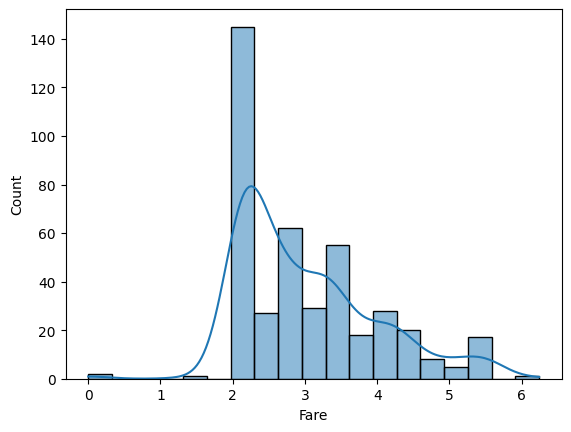

In [138]:
## chekcing the distribution after trasforming
sns.histplot(df['Fare'], kde= True)

Now data is far better

In [139]:
## splitting data into train and test 
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',  axis = 1), df.Survived)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
402,1,0,22,0,1,4.100989,2
194,2,1,8,0,2,3.511545,1
318,3,1,27,0,0,2.180892,1
7,2,1,26,1,1,3.401197,1
9,3,1,21,2,0,3.224858,1
...,...,...,...,...,...,...,...
310,3,1,18,0,0,2.268252,1
400,1,0,30,0,0,5.111184,1
54,2,1,30,0,0,2.808149,2
103,3,1,26,0,0,2.171907,1


In [140]:
## Standarized the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Assiging to original df
X_train = pd.DataFrame(X_train_scaled , columns= X_train.columns)
X_test = pd.DataFrame(X_test_scaled , columns= X_test.columns)

In [143]:
## Training The Data and testing it
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , precision_score, recall_score
import time

models = {'lr': LogisticRegression(), 'rf': RandomForestClassifier(), 'xg': XGBClassifier()}
result_ = {"Model": [], "Time_for_training": [], "Accuracy": [], 'Precision': [], 'Recall': [], 'CV_score': []}

## Let's check the model performance
for i, v in models.items():
    result_["Model"].append(i)
    mod = v  ## model for training
    start_time = time.time()  ## Checking time before training
    mod.fit(X_train, y_train)  ## fitting data for training
    end_time = time.time()     ## Ending Time
    result_["Time_for_training"].append(end_time - start_time)
    y_pred = mod.predict(X_test) ## getting prediciton for test data
    result_["Accuracy"].append(accuracy_score(y_test, y_pred))
    result_['Precision'].append(precision_score(y_test , y_pred))
    result_['Recall'].append(recall_score(y_test , y_pred))
    result_["CV_score"].append(np.mean(cross_val_score(estimator= mod, X = X_train, y = y_train)))
    
result_df = pd.DataFrame(result_)
result_df





,Model,Time_for_training,Accuracy,Precision,Recall,CV_score
0,lr,0.009370,1.0,1.0,1.0,1.0
1,rf,0.189100,1.0,1.0,1.0,1.0
2,xg,0.016694,1.0,1.0,1.0,1.0


## Comparision - 
AS expected <b>XGBoost</b> is on Top by it's less training time and then LogisticRegression since the data size is low and at last RandomForest